<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Madelon: 5-Find Optimal Threshold

_Authors: Blake Cannon (DEN)_

---
MADELON is an artificial dataset, which was part of the NIPS 2003 feature selection challenge. This is a two-class classification problem with continuous input variables. The difficulty is that the problem is multivariate and highly non-linear. Among 500 attributes, only 20 are informative, the rest are noise.

### Notebook 3

This is the fifth in a series of Jupyter Notebooks and uses finds the optimal threshold for finding features in the Madelon dataset.

## Import packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Load Pickles

In [2]:
# Loading the data saved from the last notebook
X_train = np.load('./_data/X_train.npy')
y_train = np.load('./_data/y_train.npy')
X_val = np.load('./_data/X_val.npy')
y_val = np.load('./_data/y_val.npy')
X_test = np.load('./_data/X_test.npy')

## Find Optimal Threshold

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Instatiate and fit the logistic regression model
logr = LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
# Build a function that makes ranges with floats
def frange(start, stop, step, roundval):
    i = start
    while i < stop:
        yield round(i, roundval)
        i += step

In [6]:
# Make list of thresholds to test
threshold_list = list(frange(0.01, .13, .01, 2))
threshold_list

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13]

In [7]:
features_list = []
rocauc_list = []

for thresh in threshold_list:
    stability_selection = RandomizedLogisticRegression(n_resampling=300,
                                                       n_jobs=1,
                                                       random_state=101,
                                                       scaling=0.15,
                                                       sample_fraction=0.50,
                                                       selection_threshold=thresh)
    interactions = PolynomialFeatures(degree=4, interaction_only=True)
    model = make_pipeline(stability_selection, interactions, logr)
    model.fit(X_train, y_train)
    feature_filter = model.steps[0][1].all_scores_ >= thresh
    
    counter = -1
    important_features = []
    for i in feature_filter:
        counter += 1
        if i == True:
            important_features.append(counter)
    print('Number of important features:', len(important_features))
    print('List of important features:', important_features)
    
    
    
    features_list.append(np.sum(model.steps[0][1].all_scores_ >= thresh))
    rocauc_list.append(roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))

# I should have saved the list of important features for each threshold as a dictionary or something
# but this code takes like 30 minutes to run and I am out of time

/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 45
List of important features: [4, 10, 18, 48, 55, 64, 105, 119, 128, 136, 152, 184, 196, 199, 204, 205, 211, 226, 241, 245, 251, 282, 296, 306, 323, 329, 333, 336, 338, 347, 377, 378, 384, 424, 425, 430, 431, 442, 453, 456, 471, 472, 475, 493, 496]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 24
List of important features: [4, 48, 64, 105, 128, 199, 204, 205, 211, 241, 245, 296, 323, 336, 338, 378, 424, 431, 442, 453, 472, 475, 493, 496]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 19
List of important features: [48, 64, 105, 128, 204, 241, 296, 323, 336, 338, 378, 424, 431, 442, 453, 472, 475, 493, 496]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 13
List of important features: [48, 64, 105, 128, 241, 323, 336, 338, 378, 442, 453, 472, 475]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 13
List of important features: [48, 64, 105, 128, 241, 323, 336, 338, 378, 442, 453, 472, 475]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 10
List of important features: [48, 64, 105, 128, 241, 336, 378, 442, 472, 475]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 9
List of important features: [48, 64, 105, 128, 241, 336, 378, 442, 475]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 8
List of important features: [48, 64, 105, 128, 241, 336, 378, 475]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 7
List of important features: [48, 64, 105, 241, 336, 378, 475]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 4
List of important features: [48, 241, 378, 475]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 4
List of important features: [48, 241, 378, 475]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 4
List of important features: [48, 241, 378, 475]


/Users/blake/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 4
List of important features: [48, 241, 378, 475]


In [8]:
results_df = pd.DataFrame({'threshold': threshold_list,
                           'score': rocauc_list,
                           'no-of-features': features_list})
results_df.set_index('threshold',inplace=True)
results_df

,no-of-features,score
threshold,,
0.01,45,0.766233
0.02,24,0.847478
0.03,19,0.882289
0.04,13,0.910600
0.05,13,0.897033
0.06,10,0.867989
0.07,9,0.866556
0.08,8,0.762178
0.09,7,0.738956


In [9]:
# Pickle DataFrame
results_df.to_pickle('./_data/results_df.p')

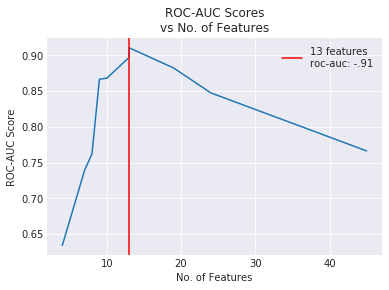

In [10]:
# Plot ROC-AUC score vs number of features
plt.plot(features_list, rocauc_list)
plt.axvline(13, c='r', label='13 features\nroc-auc: -.91')
plt.xlabel('No. of Features')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores\nvs No. of Features')
plt.legend()
plt.savefig('./_assets/5-2-rocauc-scores-vs-features.png')
plt.show()